In [36]:
# import the libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# set the custom visual
sns.set_style('darkgrid')
sns.set_palette('husl')

# import data modelling and ml libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import root_mean_squared_error

In [73]:
# load the dataset
data = pd.read_csv(r'C:\Users\hp\Desktop\machine-learning-notes\data\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
# check for data type consistency
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
# check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

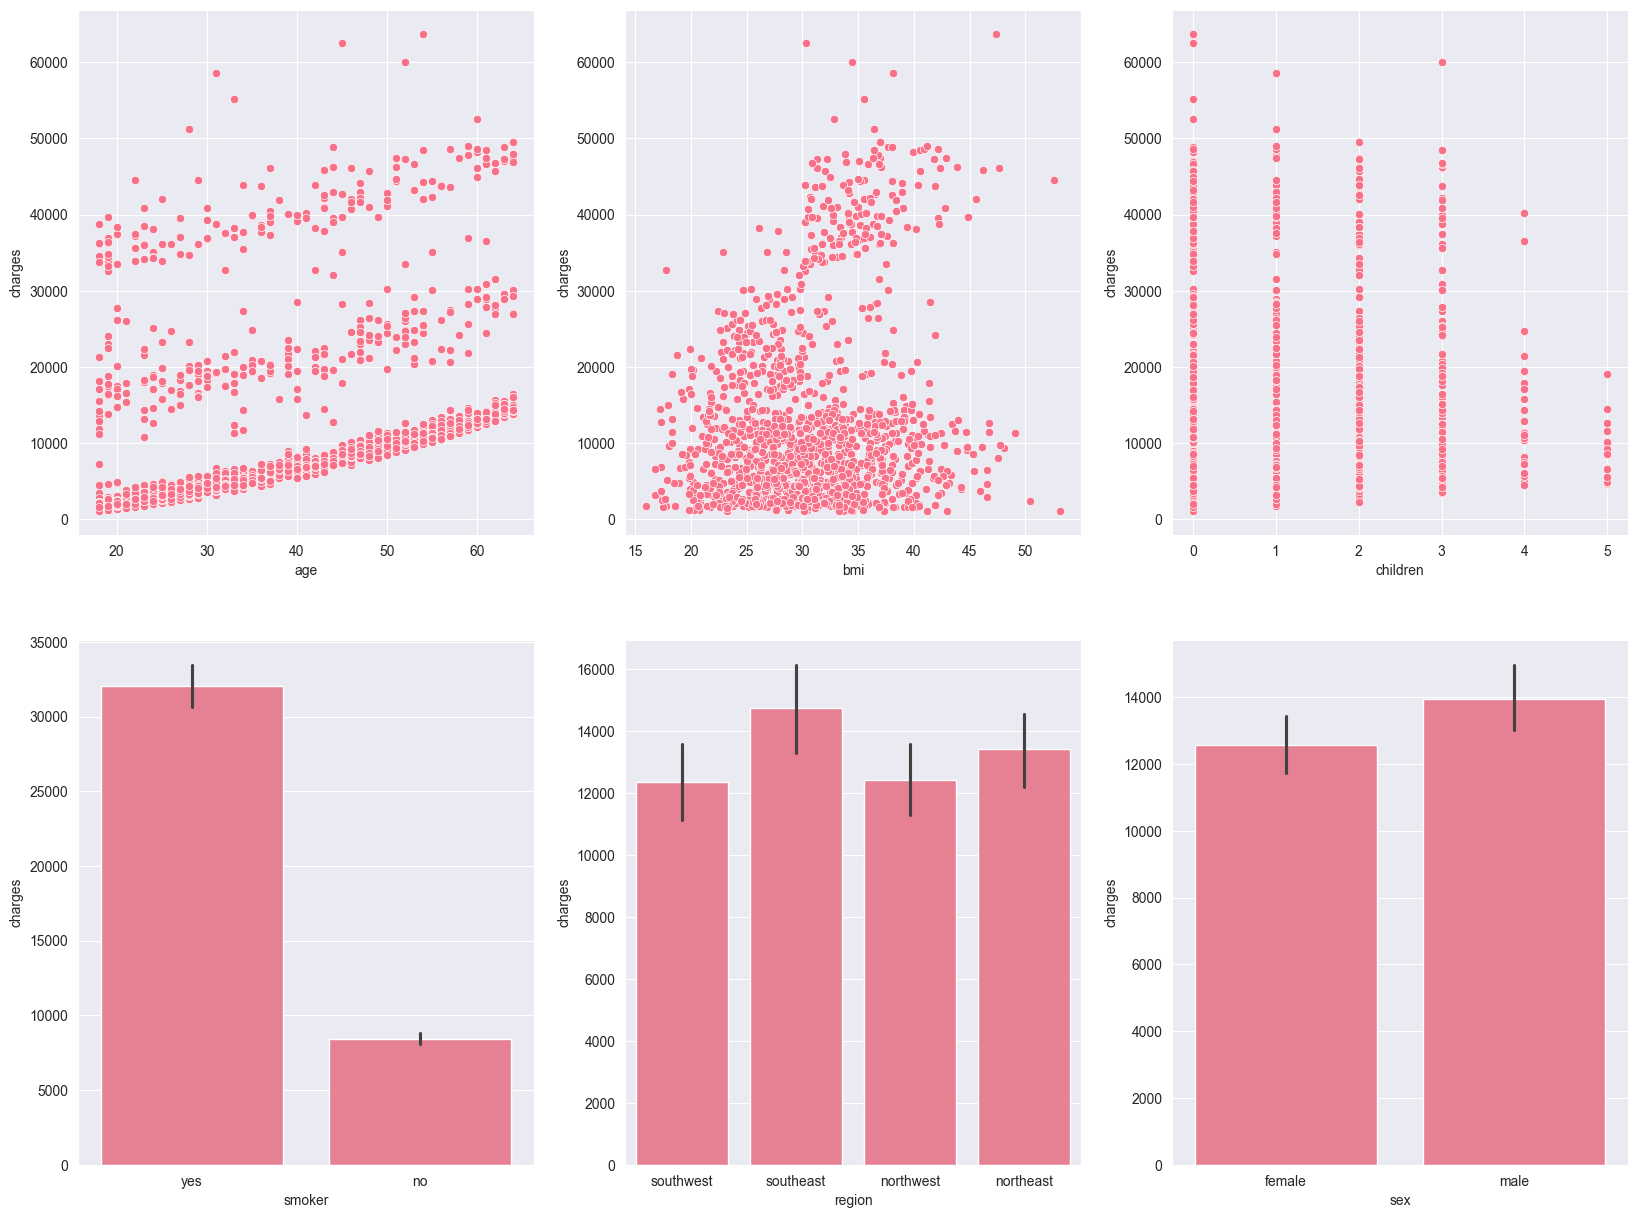

In [40]:
# visualize pairwise relationships between continous variables 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,15))
sns.scatterplot(data=data, x = 'age', y = 'charges', ax = axes[0,0])
sns.scatterplot(data=data, x = 'bmi', y = 'charges', ax = axes[0,1])
sns.scatterplot(data=data, x = 'children', y = 'charges', ax = axes[0,2])
sns.barplot(data=data, x = 'smoker', y = 'charges', ax = axes[1,0])
sns.barplot(data=data, x = 'region', y = 'charges', ax = axes[1,1])
sns.barplot(data=data, x = 'sex', y = 'charges', ax = axes[1,2])


<Axes: xlabel='log_charges', ylabel='Count'>

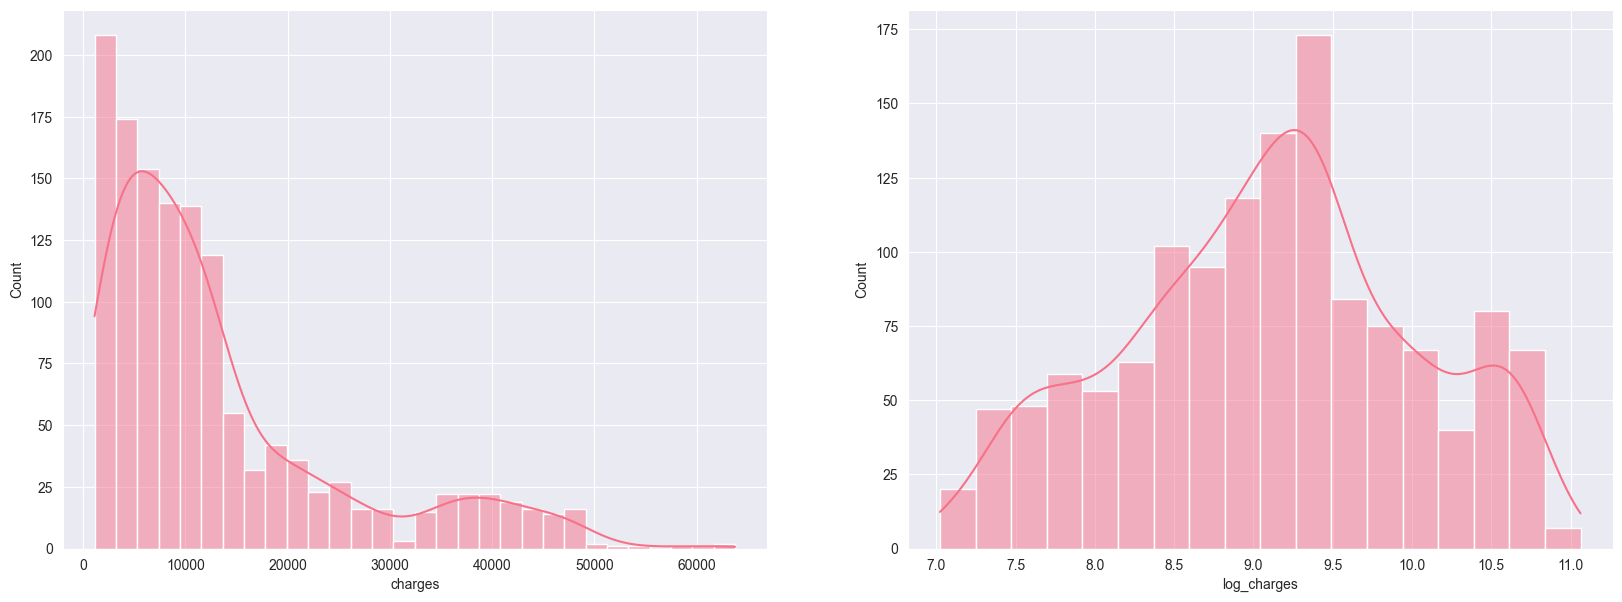

In [74]:
# check the distribution of charges 
data['log_charges'] = np.log(data['charges'].values)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
sns.histplot(data=data, x = 'charges',kde=True, ax=axes[0])
sns.histplot(data=data, x = 'log_charges',kde=True, ax=axes[1])

In [75]:
cat_cols = ['sex','smoker','region']

# init the encoder
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])
    
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


In [84]:
X = data.drop(columns= ['charges','log_charges'])
y = data['log_charges']

In [86]:
# scale the Xs

scaler = StandardScaler()
columns = list(X.columns)
X = scaler.fit_transform(X)
X = pd.DataFrame(data = X, columns=columns)

X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


In [87]:
# split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23)
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [88]:
# model Training

model = LinearRegression() # init the model
model.fit(X_train, y_train) #fit the data to the model
test_preds = model.predict(X_test)

In [89]:
# evaluate the model performance
rmse = root_mean_squared_error(y_true=y_test, y_pred=test_preds)
print(f'rmse: {rmse}')

rmse: 0.425784942831611


### Inference Mode

In [95]:
def predict_charges() -> pd.DataFrame:
    
    age = float(input('age: '))
    bmi = float(input('bmi: '))
    region = input('region: ')
    smoker = input('smoker: ')
    sex = input('sex: ')
    children = float(input('children: '))
    
    data_dict = {'age': [age],
                 'bmi':[bmi],
                 'region': [region],
                 'smoker': [smoker],
                 'sex': [sex],
                 'children':[children]}
    pred_data = pd.DataFrame(data_dict)
    encode_map = {'sex':{'female':0, 'male': 1},
                  'smoker': {'yes':1, 'no': 0},
                  'region': {'northeast':0,'northwest':1,'southeast':2,'southwest':3}}
    for col in list(encode_map.keys()):
        pred_data[col] = pred_data[col].map(encode_map[col])
        
    pred_data = pred_data[list(X.columns)]
    columns = pred_data.columns
    pred_data = scaler.transform(pred_data)
    pred_data = pd.DataFrame(data = pred_data, columns= columns)
    prediction = model.predict(pred_data)
    prediction = np.exp(prediction[0])
    
    return f'This person charges should be {prediction} naira'

predict_charges()

'This person charges should be 8162.903244008347 naira'

In [96]:
assignment_data = px.data.tips()
assignment_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
